In [190]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [191]:
BASE_PATH = "/opt/ml/input/data"
train = pd.read_csv(os.path.join(BASE_PATH, "train_data.csv"))
test = pd.read_csv(os.path.join(BASE_PATH, "test_data.csv"))
sample_submission = pd.read_csv(os.path.join(BASE_PATH, "sample_submission.csv"))

In [192]:
train

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [193]:
test

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,3,A050023001,A050000023,1,2020-01-09 10:56:31,2626
1,3,A050023002,A050000023,1,2020-01-09 10:56:57,2626
2,3,A050023003,A050000023,0,2020-01-09 10:58:31,2625
3,3,A050023004,A050000023,0,2020-01-09 10:58:36,2625
4,3,A050023006,A050000023,0,2020-01-09 10:58:43,2623
...,...,...,...,...,...,...
260109,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832
260110,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832
260111,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244
260112,7439,A040130004,A040000130,1,2020-10-14 23:09:31,8244


In [194]:
sample_submission

,id,prediction
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
739,739,0.5
740,740,0.5
741,741,0.5
742,742,0.5


# Data info

In [195]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266586 entries, 0 to 2266585
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   userID            int64 
 1   assessmentItemID  object
 2   testId            object
 3   answerCode        int64 
 4   Timestamp         object
 5   KnowledgeTag      int64 
dtypes: int64(3), object(3)
memory usage: 103.8+ MB


- userID 사용자의 고유번호입니다. 총 7,442명의 고유 사용자가 있으며, train/test셋은 이 userID를 기준으로 90/10의 비율로 나누어졌습니다.

- assessmentItemID 문항의 고유번호입니다. 총 9,454개의 고유 문항이 있습니다. 이 일련 번호에 대한 규칙은 DKT 2강 EDA에서 다루었으니 강의 들어보시면 좋을 것 같습니다.

- testId 시험지의 고유번호입니다. 문항과 시험지의 관계는 아래 그림을 참고하여 이해하시면 됩니다. 총 1,537개의 고유한 시험지가 있습니다.

- answerCode 사용자가 해당 문항을 맞췄는지 여부에 대한 이진 데이터이며 0은 사용자가 해당 문항을 틀린 것, 1은 사용자가 해당 문항을 맞춘 것입니다.

- Timestamp 사용자가 해당문항을 풀기 시작한 시점의 데이터입니다.

- KnowledgeTag 문항 당 하나씩 배정되는 태그로, 일종의 중분류 역할을 합니다. 태그 자체의 정보는 비식별화 되어있지만, 문항을 군집화하는데 사용할 수 있습니다. 912개의 고유 태그가 존재합니다.

In [196]:
for i,data in enumerate([train, test]) :
    if i == 0 : 
        print("============train==============")
    else :
        print("============test==============")
    print(f"total_length : {len(data):,}")
    print(f"userID : {len(data.userID.unique()):,}")
    print(f"assessmentItmeID : {len(data.assessmentItemID.unique()):,}")
    print(f"testId : {len(data.testId.unique()):,}")
    print(f"answerCode : {len(data.answerCode.unique()):,}")
    print(f"Timestamp : {len(data.Timestamp.unique()):,}")
    print(f"KnowledgeTag : {len(data.KnowledgeTag.unique()):,}")
    print(f"------NULL----- \n{data.isna().sum()}")

============train==============
total_length : 2,266,586
userID : 6,698
assessmentItmeID : 9,454
testId : 1,537
answerCode : 2
Timestamp : 2,076,774
KnowledgeTag : 912
------NULL----- 
userID              0
assessmentItemID    0
testId              0
answerCode          0
Timestamp           0
KnowledgeTag        0
dtype: int64
============test==============
total_length : 260,114
userID : 744
assessmentItmeID : 9,454
testId : 1,537
answerCode : 3
Timestamp : 256,622
KnowledgeTag : 912
------NULL----- 
userID              0
assessmentItemID    0
testId              0
answerCode          0
Timestamp           0
KnowledgeTag        0
dtype: int64


- 데이터를 구성은 다음과 같음
    - item : assessmentItemID(문항), testId(시험지), KnowledgeTag(중분류)
    - user : userID
    - interaction : answerCode, Timestamp
- item에 대한 정보(문항이나 시험지, 중분류 태그)는 train, test에 동일하게 모두 존재함
- assessmentItemId testId의 모든 정보는 assessItemId에 중복되어 포함됨
- timestamp와 answercode는 interaction 정보임
- timestamp 길이가 전체 row와 길이가 일치하지 않는 것은 같은 시간에 문제를 푼 유저가 있기 때문일 것으로 예상됨
- train의 answer코드는 1,0으로 2개이고, test의 answer코드는 1,0,-1으로 3개임

## Feature restructure

In [197]:
for data in [train, test] :
    data['category'] = data.apply(lambda row : row.assessmentItemID[2:3], axis=1)
    data['test_no'] = data.apply(lambda row : row.assessmentItemID[4:7], axis=1)
    data['item_no'] = data.apply(lambda row : row.assessmentItemID[7:], axis=1)
    data.rename(columns={'userID' : 'user', 'assessmentItemID' : 'item', 
                         'testId' : 'test_id', 'answerCode' : 'label',
                         'Timestamp' : 'time', 'KnowledgeTag' : 'tag'}, inplace=True)
    

In [215]:
for data in [train, test] :
    data['item_no'] = data.item_no.astype(int)
    data['category'] = data.category.astype(int)
    data['test_no'] = data.test_no.astype(int)
    data['tag'] = data.tag.astype(int)

In [216]:
print(f"unique_item_no : {sorted(train.item_no.unique())}")
print(f"unique_category : {sorted(train.category.unique())}")
print(f"unique_test_no : {sorted(train.test_no.unique())}")

unique_item_no : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
unique_category : [1, 2, 3, 4, 5, 6, 7, 8, 9]
unique_test_no : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197

# Basic Stats

## 유저별 통계

In [217]:
def percentile(s):
    return np.sum(s) / len(s)

In [218]:
user_data = train.groupby('user').agg({
    'item' : 'count',
    'label' : percentile
})  
train_groupby.describe()

,item,label
count,6698.000000,6698.000000
mean,338.397432,0.628909
std,321.331429,0.159639
min,9.000000,0.000000
25%,78.000000,0.527273
50%,231.500000,0.651757
75%,513.000000,0.751203
max,1860.000000,1.000000


In [219]:
user_data.corr()

,item,label
item,1.000000,0.168041
label,0.168041,1.000000


- item = 푼 문제의 수
- label = 정답률
- 상관관계가 높지는 않음

### 유저 별 푼 문제 수 분포

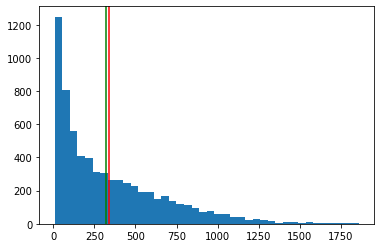

In [220]:
plt.hist(user_data.item, bins=40)
plt.axvline(user_data.item.mean(), color='r')
plt.axvline(user_data.item.std(), color='g')
plt.show()

- 문제를 적게 푼 유저가 대부분인 Long tail의 형태를 띄고 있다.

### 유저 별 정답률 분포

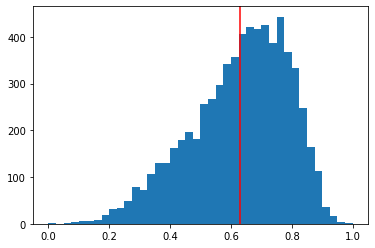

In [221]:
plt.hist(user_data.label, bins=40)
plt.axvline(user_data.label.mean(), color='r')
plt.show()

## 문제별 통계

### 분류별 정답률

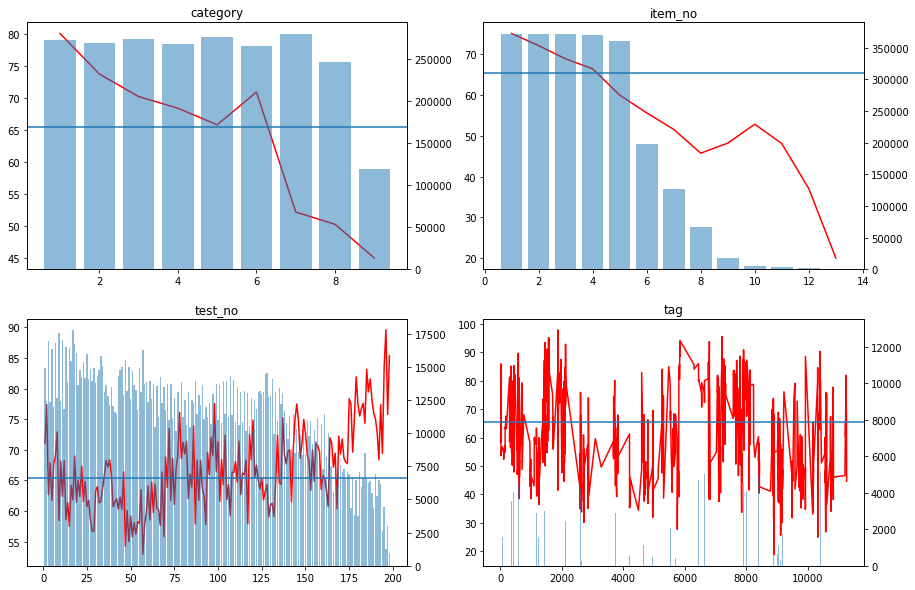

In [480]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
axes = axes.flatten()
for i, col in enumerate(['category', 'item_no', 'test_no', 'tag']) :
    hit_ratio = train.groupby(col).label.sum() / train.groupby(col).label.count() * 100
    item_count= train.groupby(col).label.count()
    ax2 = axes[i].twinx()
    axes[i].plot(hit_ratio, color='r')
    ax2.bar(x=item_count.index, height=item_count.values, alpha=0.5)
    axes[i].axhline(train.label.sum() / len(train) * 100)
    axes[i].set_title(col)

- bar는 group별 문제수, line은 group별 정답률
- train과 test의 정답률은 거의 유사함
- category와 item_no는 수가 커질수록 정답률이 낮아지는 경향이 있음(난이도?)
- test, tag는 독립적으로는 특징을 파악하기 어려움

# 가설

## category_no과 item_no는 일종의 단계이며, 난이도를 반영한다.

In [606]:
item_grp = train.groupby('user').agg({
    'item' : 'count',
    'label' : 'sum',
    'item_no' : 'mean',
    'category' : 'mean',
    'test_no' : 'mean',
    'tag' : 'mean'
})

In [607]:
item_grp['rate'] = item_grp['label'] / item_grp['item']

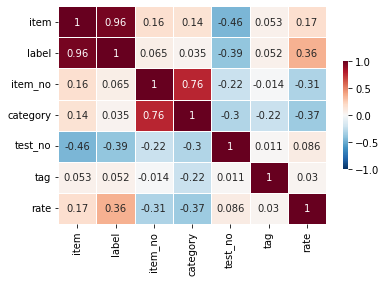

In [608]:
corr = item_grp.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,
               annot = True,
               # mask = mask,
               linewidths=.5,
               cmap = 'RdBu_r',
               vmin = -1, vmax = 1,
           cbar_kws={"shrink" : .5})
plt.show()

1) 가설 확인
- 유저들이 푼 item_no와 category의 평균 값과 정답률 사이의 상관계수는 각각 -0.31, -0.37로 보통 수준의 음의 상관관계를 가지고 있다. -> 강하지는 않지만 category와 item_no는 단계적인 속성을 가지고 있다.

2) 추가 확인 필요
- category, item_no 사이에 강한 양의 상관관계가 존재한다.(0.76) category가 높아지면, item_no도 높아졌다. category 또는 item_no가 아닐 수 있다. 둘은 포함관계가 아닐수도 있다.

- 적은 문제를 푼 사람일수록 낮은 item_no나 category의 문제를 주로 풀었을 가능성이 있지만, 0.16, 0.14로 아주 약한 상관관계만이 파악되었다. 평균이 아닌 다른 접근 방법을 고려해보자

## category와 item_no 사이에는 단순 포함관계 이상의 관계가 존재한다.

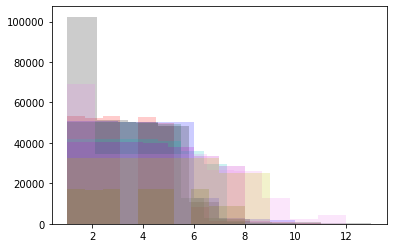

In [609]:
for i, c in enumerate(['r','g','b','k','c','m','violet','y','olive']):
    plt.hist(train[train['category'] == i+1].item_no,
             color=c,
             alpha=0.2)

In [610]:
matrix = pd.DataFrame(0, index=range(1,14), columns=range(1,10))

In [611]:
for i in range(1,10):
    counts = train[train['category'] == i].item_no.value_counts()
    ind = counts.index
    val = counts.values
    for x in range(len(ind)) :
        matrix[i][ind[x]] = val[x]

In [612]:
cat_item_matrix = round((matrix) / matrix.sum() * 100, 1)
item_cat_matrix = round(((matrix.T) / matrix.T.sum() * 100).T, 1)

In [613]:
item_cat_matrix

,1,2,3,4,5,6,7,8,9
1,14.3,13.5,13.6,13.8,11.3,10.9,9.3,8.7,4.6
2,14.2,13.6,13.7,13.8,11.2,10.9,9.3,8.7,4.6
3,14.3,13.5,13.6,13.8,11.3,10.9,9.3,8.7,4.6
4,14.3,13.5,13.7,13.6,11.4,10.8,9.3,8.7,4.6
5,13.8,13.7,14.0,13.4,11.3,10.5,9.6,9.0,4.7
6,4.1,6.5,6.3,5.5,18.3,16.9,17.4,16.4,8.6
7,1.3,2.1,2.4,1.3,23.3,22.3,20.7,19.8,6.8
8,1.1,2.0,3.4,0.8,1.0,2.4,38.9,37.6,12.8
9,0.0,4.4,10.0,2.9,2.5,6.2,69.9,4.2,0.0
10,0.0,10.1,15.4,10.0,4.3,4.3,41.5,14.4,0.0


In [614]:
cat_item_matrix

,1,2,3,4,5,6,7,8,9
1,19.6,18.7,18.5,19.2,15.2,15.3,12.4,13.1,14.3
2,19.3,18.8,18.5,19.2,15.1,15.3,12.4,13.1,14.2
3,19.5,18.7,18.4,19.2,15.3,15.3,12.4,13.1,14.3
4,19.4,18.6,18.5,18.9,15.3,15.1,12.4,13.1,14.3
5,18.3,18.4,18.5,18.1,14.8,14.4,12.4,13.1,14.3
6,3.0,4.8,4.6,4.1,13.1,12.7,12.3,13.1,14.3
7,0.6,1.0,1.1,0.6,10.7,10.7,9.4,10.2,7.2
8,0.3,0.5,0.8,0.2,0.3,0.6,9.4,10.2,7.2
9,0.0,0.3,0.7,0.2,0.2,0.4,4.6,0.3,0.0
10,0.0,0.2,0.3,0.2,0.1,0.1,0.8,0.3,0.0


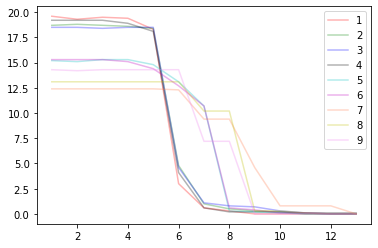

In [615]:
for i, c in enumerate(['r','g','b','k','c','m','coral','y','violet']):
    plt.plot(cat_item_matrix.loc[:,i+1],
            color=c,
            alpha=0.3,
            label=i+1)
plt.legend()

1. 가설확인
- category별 item_no 문제 분포의 차이가 존재하며, category의 난이도 차이가 여기에서 기인했을 확률이 있다.
- 따라서 category는 실제 category적인 성격을 띄는 분류가 아닌, item_no의 종속변수일 확률이 있다.

## item_no나 category가 높은 문제는 문제를 평균보다 많이 푼 사람이 풀었을 확률이 높다

In [616]:
item_count = pd.DataFrame(train.groupby('user').count().item)

In [617]:
item_count

,item
user,
0,745
1,933
2,276
5,833
6,921
...,...
7436,15
7437,16
7438,16


In [683]:
temp = pd.merge(train, item_count, how='inner', left_on='user', right_on=item_count.index)

In [749]:
temp['many'] = temp['item_y'] > 338

In [750]:
temp['many'].value_counts()

True     1748998
False     517588
Name: many, dtype: int64

In [751]:
corrat.iloc[:9,:]

count  sum
many  tag            
False 23     680  370
      24     127   72
      25      43   37
      26     927  533
      30     186   99
      31     359  186
      32    1481  758
      78     964  534
      116    567  289

In [752]:
len(train.tag.unique())

912

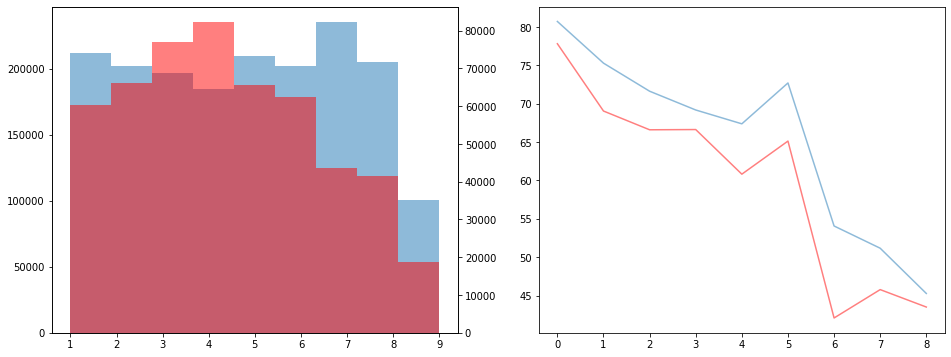

In [753]:
corrat = temp.groupby(['many', 'category']).label.agg(['count', 'sum'])
fcor = list(corrat.iloc[:9,:]['sum'] / corrat.iloc[:9,:]['count'] * 100)
tcor = list(corrat.iloc[9:,:]['sum'] / corrat.iloc[9:,:]['count'] * 100)

fig, ax = plt.subplots(1,2, figsize=(16,6))
tx0 = ax[0].twinx()
ax[0].hist(temp[temp['many'] == True].category,
        bins=9,
        alpha=0.5)
tx0.hist(temp[temp['many'] == False].category,
        bins=9,
        color='r',
        alpha=0.5)

ax[1].plot(tcor, alpha=0.5)
ax[1].plot(fcor,
        color='r',
        alpha=0.5)

plt.show()

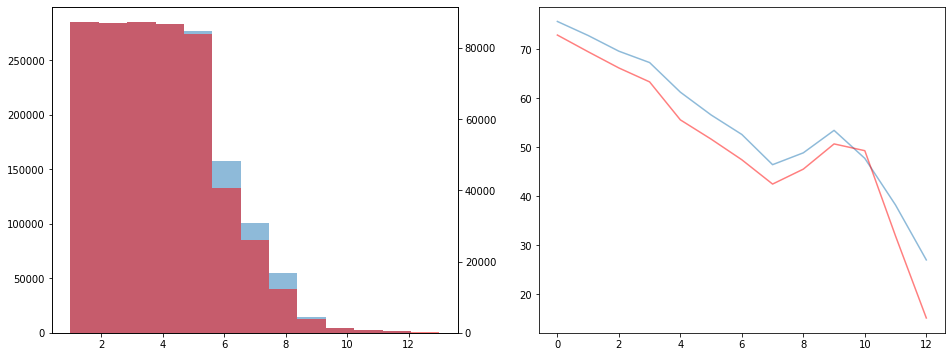

In [754]:
corrat = temp.groupby(['many', 'item_no']).label.agg(['count', 'sum'])
fcor = list(corrat.iloc[:13,:]['sum'] / corrat.iloc[:13,:]['count'] * 100)
tcor = list(corrat.iloc[13:,:]['sum'] / corrat.iloc[13:,:]['count'] * 100)

fig, ax = plt.subplots(1,2, figsize=(16,6))
tx0 = ax[0].twinx()
ax[0].hist(temp[temp['many'] == True].item_no,
        bins=13,
        alpha=0.5)
tx0.hist(temp[temp['many'] == False].item_no,
        bins=13,
        color='r',
        alpha=0.5)

ax[1].plot(tcor, alpha=0.5)
ax[1].plot(fcor,
        color='r',
        alpha=0.5)

plt.show()

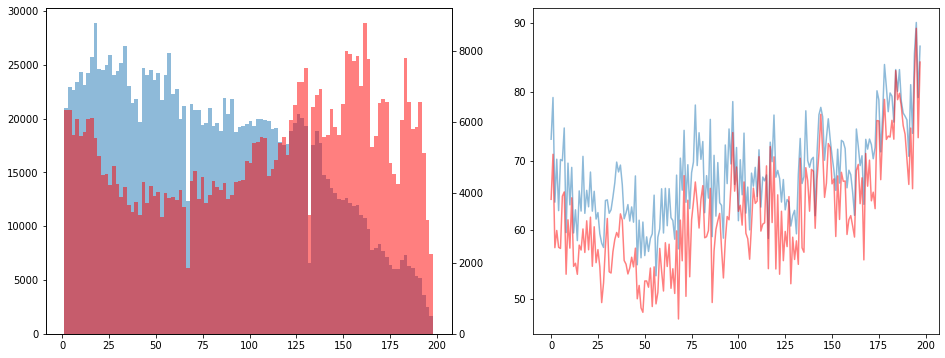

In [755]:
corrat = temp.groupby(['many', 'test_no']).label.agg(['count', 'sum'])
fcor = list(corrat.iloc[:198,:]['sum'] / corrat.iloc[:198,:]['count'] * 100)
tcor = list(corrat.iloc[198:,:]['sum'] / corrat.iloc[198:,:]['count'] * 100)

fig, ax = plt.subplots(1,2, figsize=(16,6))
tx0 = ax[0].twinx()
ax[0].hist(temp[temp['many'] == True].test_no,
        bins=100,
        alpha=0.5)
tx0.hist(temp[temp['many'] == False].test_no,
        bins=100,
        color='r',
        alpha=0.5)

ax[1].plot(tcor, alpha=0.5)
ax[1].plot(fcor,
        color='r',
        alpha=0.5)

plt.show()

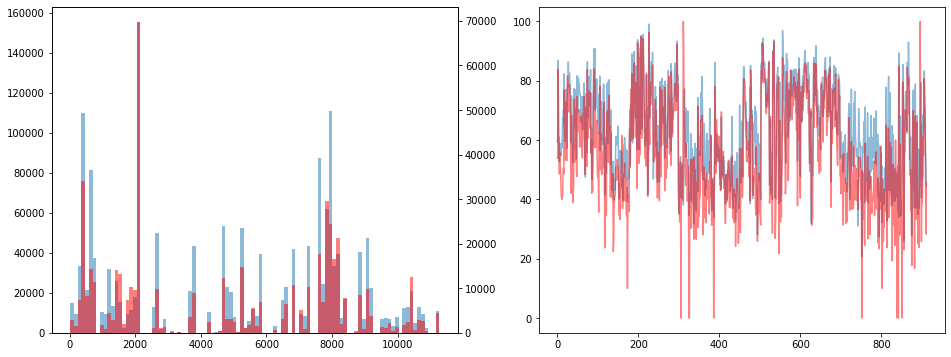

In [756]:
corrat = temp.groupby(['many', 'tag']).label.agg(['count', 'sum'])
fcor = list(corrat.iloc[:912,:]['sum'] / corrat.iloc[:912,:]['count'] * 100)
tcor = list(corrat.iloc[912:,:]['sum'] / corrat.iloc[912:,:]['count'] * 100)

fig, ax = plt.subplots(1,2, figsize=(16,6))
tx0 = ax[0].twinx()
ax[0].hist(temp[temp['many'] == True].tag,
        bins=100,
        alpha=0.5)
tx0.hist(temp[temp['many'] == False].tag,
        bins=100,
        color='r',
        alpha=0.5)

ax[1].plot(tcor, alpha=0.5)
ax[1].plot(fcor,
        color='r',
        alpha=0.5)

plt.show()

1. 가설확인
- 문제를 평균보다 많이 푼사람은 1~8 category를 고르게 푼 경향이 있고,
- 문제를 평균보다 같거나 적게 푼 사람은 3~4 category를 가장 많이 풀었으며, category 넘버가 높아질수록 급격하게 감소하는 경향이 있다.
- item_no기준으로는 number가 낮은 구간에서는 차이가 거의 존재하지 않았지만, 난이도가 높아질수록 평균 이상의 문제를 푼 유저의 비율이 높아진다. 
- 문제를 많이 푼 사람은 문제를 적게 푼 사람보다  item_no 6~9의 구간에서 더 많은 문제를 풀었으며 그 이상 구간은 표본이 적어 확인이 어렵다.
- category기준으로는, 문제를 적게 푼 사람과 많이 푼 사람의 분포 자체가 다르게 나오는 경향이 있었다.
- test 기준 차이도 명확했는데, 문제를 적게푼 사람은 높은 test_no의 문제를 주로 풀었고, 많인 푼 사람은 낮은 test_no의 문제를 주로 풀었다. 의외의 결과
- 정답률은 거의 모든 구간에서 문제를 평균보다 많이 푼 사람이 높았다. feature로 활용할수 있을듯하다.

2. 추가 확인 필요
- 3,4 category와 7,8 category 의 특징은 무엇인가
- item_no를 1\~5 / 6\~9 / 10~13 세 구간으로 나누어 생각해볼 수 있을까

## Item_no를 구간별로 나눠서 Categorize 해보자

In [593]:
temp = train.copy()

In [594]:
temp['item_cat'] = 0

In [595]:
temp['item_cat'] = pd.cut(x=temp['item_no'], bins=[0,4,10,13],
                          labels = [0,1,2])

In [596]:
temp

,user,item,test_id,label,time,tag,category,test_no,item_no,item_cat
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,1,1,0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6,1,2,0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6,1,3,0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6,1,4,0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6,1,5,1
...,...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,3,71,5,1
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,4,165,1,0
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,4,165,2,0
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,4,165,3,0


In [597]:
temp.drop(['item', 'test_id', 'time'], axis=1, inplace=True)

## 시간 변수를 활용해보자

In [728]:
train

,user,item,test_id,label,time,tag,category,test_no,item_no,item_cat
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,1,1,0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6,1,2,0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6,1,3,0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6,1,4,0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6,1,5,0
...,...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,3,71,5,0
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,4,165,1,0
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,4,165,2,0
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,4,165,3,0
